<a href="https://colab.research.google.com/github/VIGNESHMADAN/TSA_LAB_7THSEM/blob/main/TSA_LAB_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROGRAM-1**

Different forecasting techniques like Simple Exponential
Smoothing (SES), Simple Moving Average (SMA) & Holt-Winters
Smoothing.

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [ ]:
# Load AirPassengers
data = sm.datasets.get_rdataset("AirPassengers").data
y = data['value']

# SMA (window=12)
sma = y.rolling(12).mean()

# SES
ses = SimpleExpSmoothing(y).fit().fittedvalues

# Holt-Winters
hw = ExponentialSmoothing(
        y, trend='add', seasonal='add', seasonal_periods=12
     ).fit().fittedvalues

Calculate the evaluation metrics such as Mean Absolute Error
(MAE), Mean Squared Error (MSE), and Root Mean Squared
Error (RMSE) for each forecasting technique.

In [ ]:
# Metrics function
def metrics(true, pred):
    mask = ~np.isnan(pred)
    mae = mean_absolute_error(true[mask], pred[mask])
    mse = mean_squared_error(true[mask], pred[mask])
    rmse = np.sqrt(mse)
    return mae, mse, rmse

print("SMA:", metrics(y, sma))
print("SES:", metrics(y, ses))
print("Holt-Winters:", metrics(y, hw))

SMA: (34.1484962406015, 2304.887374686717, np.float64(48.00924259647008))
SES: (25.680555660898488, 1128.500010267728, np.float64(33.593154217306356))
Holt-Winters: (9.40867670802026, 149.75300145721516, np.float64(12.237360886123085))


Identify the trends and seasonal patterns for the above
forecasting techniques for the given dataset.

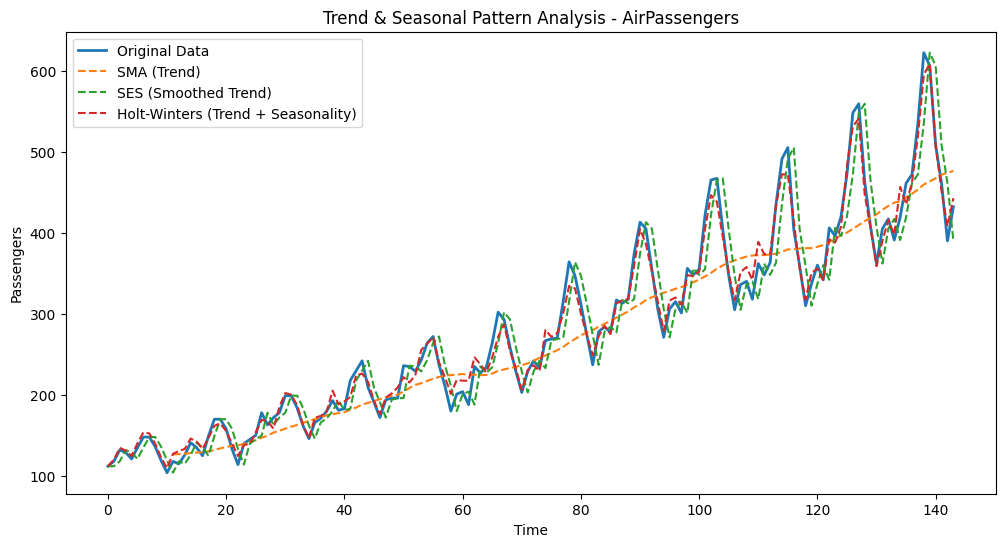

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y, label='Original Data', linewidth=2)
plt.plot(sma, label='SMA (Trend)', linestyle='dashed')
plt.plot(ses, label='SES (Smoothed Trend)', linestyle='dashed')
plt.plot(hw, label='Holt-Winters (Trend + Seasonality)', linestyle='dashed')

plt.title("Trend & Seasonal Pattern Analysis - AirPassengers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()


**PROGRAM-2**

Generate a sequence of white noise data and visualize it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm

In [ ]:
# Load dataset
y = sm.datasets.get_rdataset("AirPassengers").data['value']

# White Noise
wn = np.random.normal(0, 1, len(y))


Compare the graphs of both White Noise and the time series data.

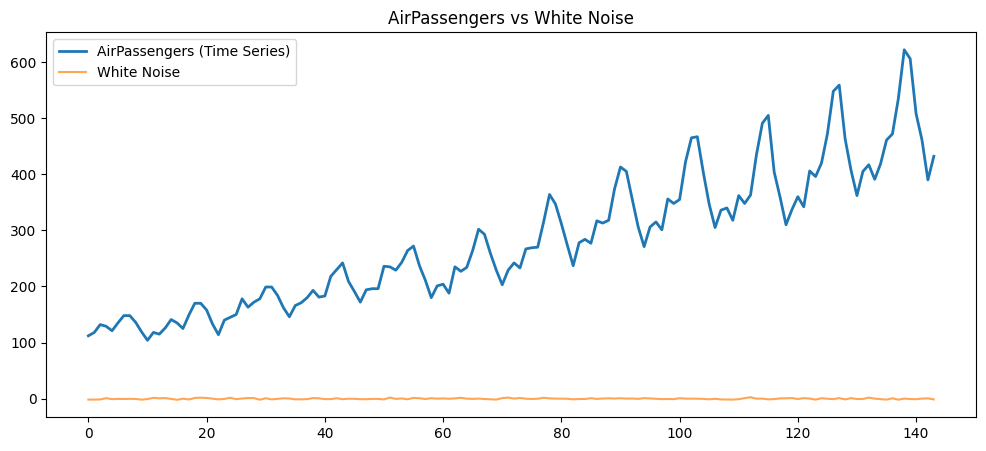

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y, label="AirPassengers (Time Series)", linewidth=2)
plt.plot(wn, label="White Noise", alpha=0.7)
plt.title("AirPassengers vs White Noise")
plt.legend()
plt.show()

Use statistical tests such as the Augmented Dickey-Fuller Test
and the Kwiatkowski–Phillips–Schmidt–Shin test to determine
the presence of stationarity.

In [ ]:
# Stationarity Tests
adf_pvalue = adfuller(y)[1]
kpss_pvalue = kpss(y, nlags="auto")[1]

print("ADF Test p-value:", adf_pvalue)
print("KPSS Test p-value:", kpss_pvalue)

ADF Test p-value: 0.991880243437641
KPSS Test p-value: 0.01


/tmp/ipython-input-583133420.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_pvalue = kpss(y, nlags="auto")[1]


**PROGRAM-3**

Use statistical techniques such as moving averages to detect and
quantify trends in the data.

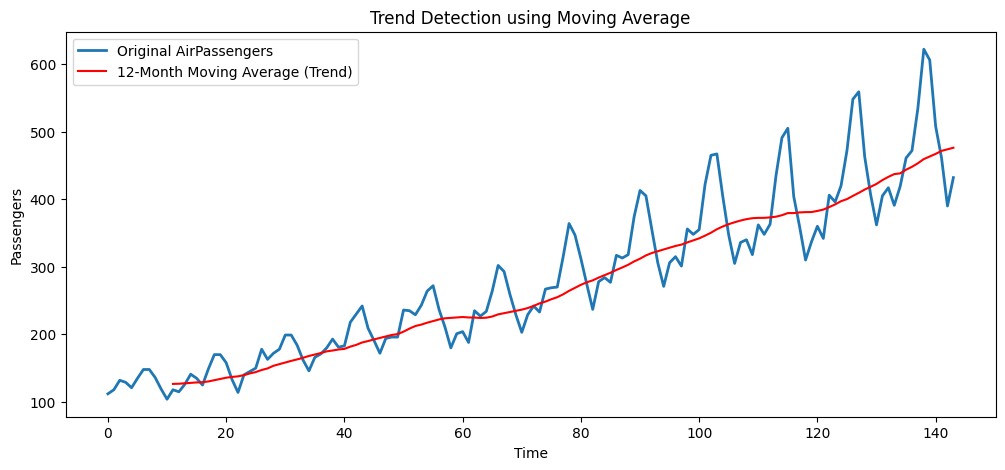

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y = sm.datasets.get_rdataset("AirPassengers").data['value']
# Trend using Moving Average (12-month)
trend = y.rolling(window=12).mean()

plt.figure(figsize=(12,5))
plt.plot(y, label="Original AirPassengers", linewidth=2)
plt.plot(trend, label="12-Month Moving Average (Trend)", color="red")
plt.title("Trend Detection using Moving Average")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Plot the ACF and PACF for a given time series dataset using
Python libraries such as statsmodels and analyze the data to
identify any underlying patterns such as seasonality or long-term
trends

<Figure size 1200x400 with 0 Axes>

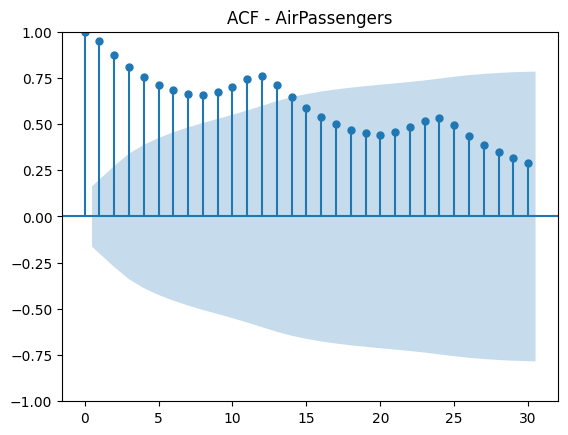

<Figure size 1200x400 with 0 Axes>

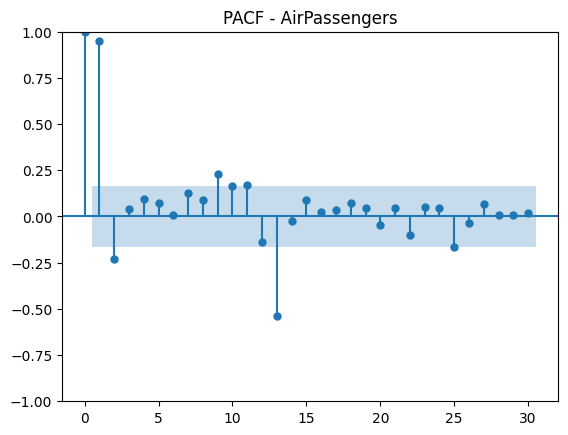

In [ ]:
plt.figure(figsize=(12,4))
plot_acf(y, lags=30)
plt.title("ACF - AirPassengers")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(y, lags=30, method="ywm")
plt.title("PACF - AirPassengers")
plt.show()

**PROGRAM-4**

Examine the Autocorrelation Function (ACF) and Partial
Autocorrelation Function (PACF) plots to determine the order of
the AR model.

<Figure size 1200x400 with 0 Axes>

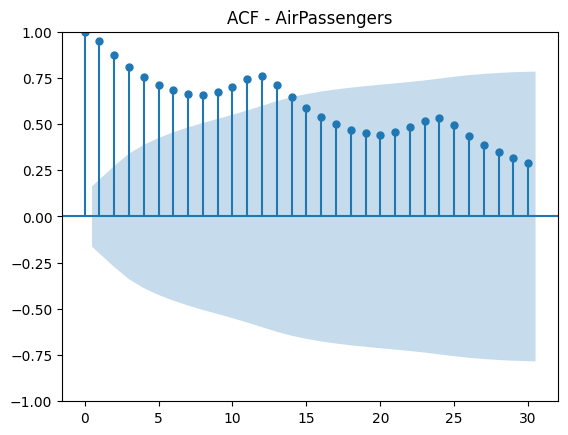

<Figure size 1200x400 with 0 Axes>

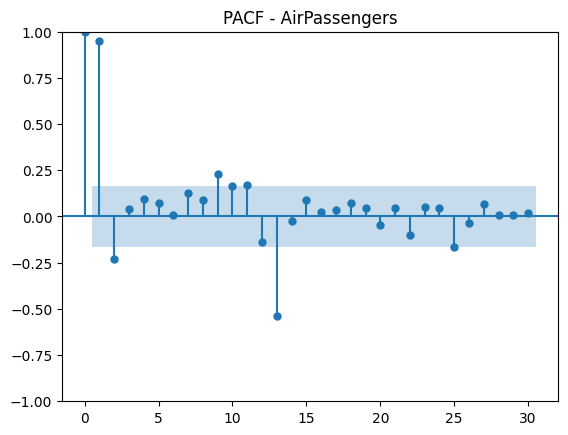

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
y = sm.datasets.get_rdataset("AirPassengers").data['value']
plt.figure(figsize=(12,4))
plot_acf(y, lags=30)
plt.title("ACF - AirPassengers")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(y, lags=30, method='ywm')
plt.title("PACF - AirPassengers")
plt.show()

Fit an AR(1) model to the dataset and evaluate its performance.

In [ ]:
ar1 = AutoReg(y, lags=1).fit()
pred_ar1 = ar1.fittedvalues

rmse_ar1 = np.sqrt(mean_squared_error(y[1:], pred_ar1))

print("\nAR(1) Model Summary:")
print(ar1.summary())
print("AR(1) RMSE:", rmse_ar1)


AR(1) Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Wed, 26 Nov 2025   AIC                           1414.212
Time:                        13:32:52   BIC                           1423.100
Sample:                             1   HQIC                          1417.823
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7055      7.084      1.935      0.053      -0.178      27.589
value.L1       0.9589      0.023     41.106      0.000       0.913       1.005
                              

Explore the possibility of fitting higher lag AR models to
potentially capture more complex dependencies in the dataset.

In [ ]:
ar5 = AutoReg(y, lags=5).fit()
pred_ar5 = ar5.fittedvalues

rmse_ar5 = np.sqrt(mean_squared_error(y[5:], pred_ar5))

print("\nAR(5) Model Summary:")
print(ar5.summary())
print("AR(5) RMSE:", rmse_ar5)


AR(5) Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  144
Model:                     AutoReg(5)   Log Likelihood                -670.045
Method:               Conditional MLE   S.D. of innovations             30.010
Date:                Wed, 26 Nov 2025   AIC                           1354.089
Time:                        13:34:52   BIC                           1374.631
Sample:                             5   HQIC                          1362.437
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8632      6.922      1.425      0.154      -3.703      23.430
value.L1       1.2990      0.083     15.621      0.000       1.136       1.462
value.L2      -0.5321      0.1

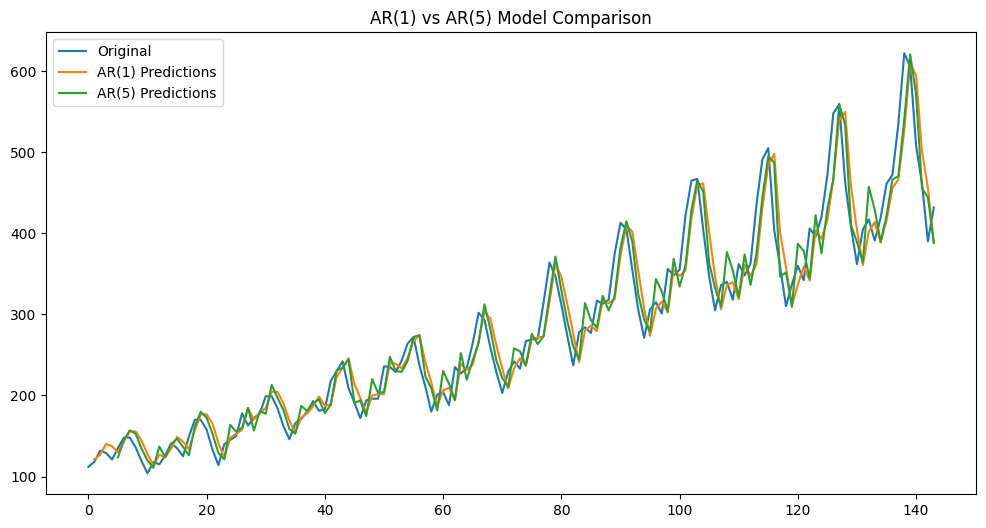

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y, label="Original")
plt.plot(pred_ar1, label="AR(1) Predictions")
plt.plot(pred_ar5, label="AR(5) Predictions")
plt.legend()
plt.title("AR(1) vs AR(5) Model Comparison")
plt.show()

**PROGRAM-5**

Plot the ACF and PACF

<Figure size 1200x400 with 0 Axes>

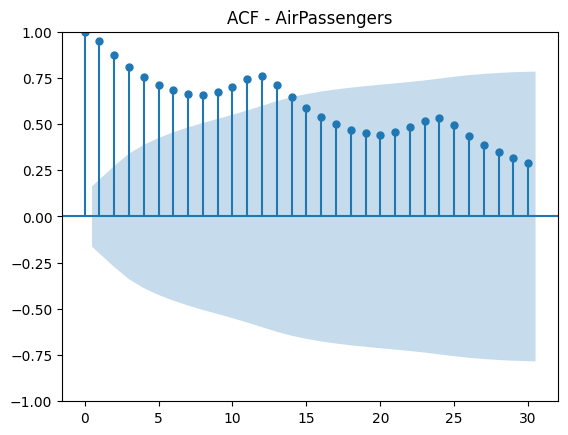

<Figure size 1200x400 with 0 Axes>

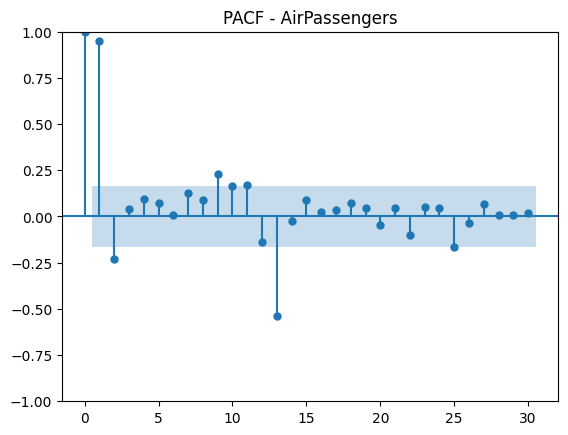

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
y = sm.datasets.get_rdataset("AirPassengers").data['value']
plt.figure(figsize=(12,4))
plot_acf(y, lags=30)
plt.title("ACF - AirPassengers")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(y, lags=30, method='ywm')
plt.title("PACF - AirPassengers")
plt.show()

Fit an MA(1) model

In [ ]:
ma1 = ARIMA(y, order=(0, 0, 1)).fit()
pred_ma1 = ma1.fittedvalues

# Performance metric
rmse_ma1 = np.sqrt(mean_squared_error(y[1:], pred_ma1[1:]))

print("\nMA(1) Summary:")
print(ma1.summary())
print("MA(1) RMSE:", rmse_ma1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



MA(1) Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Wed, 26 Nov 2025   AIC                           1618.863
Time:                        13:37:05   BIC                           1627.772
Sample:                             0   HQIC                          1622.483
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6500     11.649     24.092      0.000     257.818     303.482
ma.L1          0.9642      0.030     32.239      0.000       0.906       1.023
sigma2      4205.2148    586.727    

Fit higher lag MA model

In [ ]:
ma3 = ARIMA(y, order=(0, 0, 3)).fit()
pred_ma3 = ma3.fittedvalues

rmse_ma3 = np.sqrt(mean_squared_error(y[3:], pred_ma3[3:]))

print("\nMA(3) Summary:")
print(ma3.summary())
print("MA(3) RMSE:", rmse_ma3)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



MA(3) Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -725.681
Date:                Wed, 26 Nov 2025   AIC                           1461.362
Time:                        13:37:32   BIC                           1476.211
Sample:                             0   HQIC                          1467.396
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2934     16.609     16.876      0.000     247.741     312.846
ma.L1          1.4274    121.637      0.012      0.991    -236.977     239.831
ma.L2          1.4272     52.343    

Compare the performances of MA(1) and higher lag MA model.

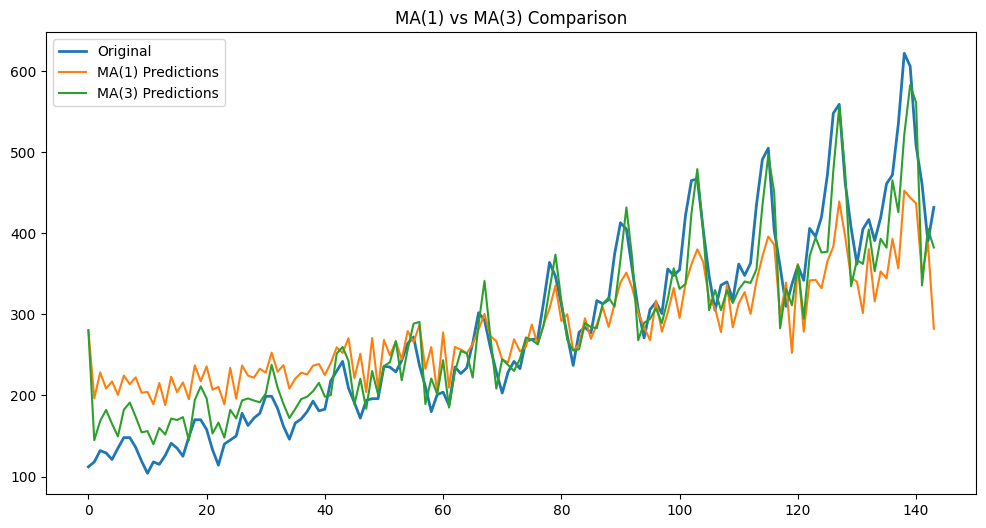

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y, label="Original", linewidth=2)
plt.plot(pred_ma1, label="MA(1) Predictions")
plt.plot(pred_ma3, label="MA(3) Predictions")
plt.title("MA(1) vs MA(3) Comparison")
plt.legend()
plt.show()

**PROGRAM-6**

Initialize the ARMA

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

y = sm.datasets.get_rdataset("AirPassengers").data['value']
#data stationary for ARMA
d_y = y.diff().dropna()
arma_model = ARIMA(d_y, order=(2, 0, 2))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Train the model on the dataset using the fit() method.

In [ ]:
arma_results = arma_model.fit()
print("\nARMA(2,2) Summary:")
print(arma_results.summary())


ARMA(2,2) Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -666.022
Date:                Wed, 26 Nov 2025   AIC                           1344.044
Time:                        13:40:34   BIC                           1361.821
Sample:                             0   HQIC                          1351.267
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5325      0.735      3.446      0.001       1.092       3.973
ar.L1          1.6478      0.028     58.901      0.000       1.593       1.703
ar.L2         -0.9094      0.025

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generate forecasts by utilizing the predict() function and
designating the desired time index or indices.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Forecast for next 10 values:
143     2.247573
144    18.893316
145    29.750753
146    32.503654
147    27.165963
148    15.867066
149     2.103053
150   -10.301752
151   -18.225066
152   -19.999918
Name: predicted_mean, dtype: float64


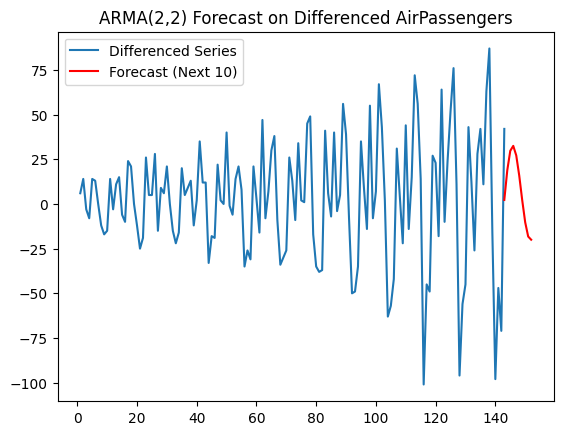

In [ ]:
forecast = arma_results.predict(len(d_y), len(d_y) + 9)
print("\nForecast for next 10 values:")
print(forecast)

plt.plot(d_y, label="Differenced Series")
plt.plot(forecast, label="Forecast (Next 10)", color='red')
plt.legend()
plt.title("ARMA(2,2) Forecast on Differenced AirPassengers")
plt.show()

**PROGRAM-7**

Initialize the ARIMA model by invoking ARIMA() and
specifying the p, d, and q parameters (p is the number of
autoregressive terms, d is the number of nonseasonal differences
needed for stationarity and q is the number of lagged forecast
errors).

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

y = sm.datasets.get_rdataset("AirPassengers").data['value']

model = ARIMA(y, order=(2, 1, 2))

Train the model on your dataset using the fit() method.

In [ ]:
model_fit = model.fit()
print("\nARIMA(2,1,2) Summary:")
print(model_fit.summary())


ARIMA(2,1,2) Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 26 Nov 2025   AIC                           1353.347
Time:                        13:43:14   BIC                           1368.161
Sample:                             0   HQIC                          1359.366
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generate forecasts by utilizing the predict() function and
designating the desired time index or indices.

In [ ]:
forecast = model_fit.predict(start=len(y), end=len(y)+9)
print("\nForecast for next 10 months:")
print(forecast)


Forecast for next 10 months:
144    439.854863
145    465.296545
146    500.666051
147    535.971401
148    561.689094
149    571.312667
150    562.972100
151    539.729052
152    508.528057
153    478.147364
Name: predicted_mean, dtype: float64
